<a href="https://colab.research.google.com/github/saltatt/linear-regression/blob/main/copy%22Car_Price_Prediction_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа: Линейная регрессия на данных о продаже автомобилей

# Задание: шаг за шагом выполнить анализ данных и построить модель линейной регрессии.
# В ячейках ниже даны подсказки, а код вам нужно дописать самостоятельно.

# 1. Импортируйте необходимые библиотеки:
# - pandas
# - matplotlib.pyplot
# - seaborn

In [ ]:
#your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Загрузите датасет "car_data.csv" и выведите первые 5 строк таблицы.

In [ ]:
#your code here
df = pd.read_csv('/content/car_data.csv')

In [ ]:
#your code here
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# 3. Выведите общую информацию о данных (тип данных, количество строк, столбцов).

In [ ]:
#your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# 4. Проверьте наличие пропусков в таблице.

In [ ]:
#your code here
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


# 5. Посмотрите описательные статистики числовых признаков.

In [ ]:
#your code here
df.describe(include="number")

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# 6. Выведите список всех колонок.

In [ ]:
#your code here
list(df.columns)

['Car_Name',
 'Year',
 'Selling_Price',
 'Present_Price',
 'Kms_Driven',
 'Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Owner']

# 7. Определите количество значений в категориальных признаках:
# - Fuel_Type
# - Seller_Type
# - Transmission

In [ ]:
#your code here
df['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,239
Diesel,60
CNG,2


In [ ]:
#your code here
df['Seller_Type'].value_counts()

,count
Seller_Type,
Dealer,195
Individual,106


In [ ]:
#your code here
df['Transmission'].value_counts()

,count
Transmission,
Manual,261
Automatic,40


# 8. Визуализируйте распределение продаж (Selling_Price) в зависимости от категориальных признаков. Используйте matplotlib и seaborn (barplot).

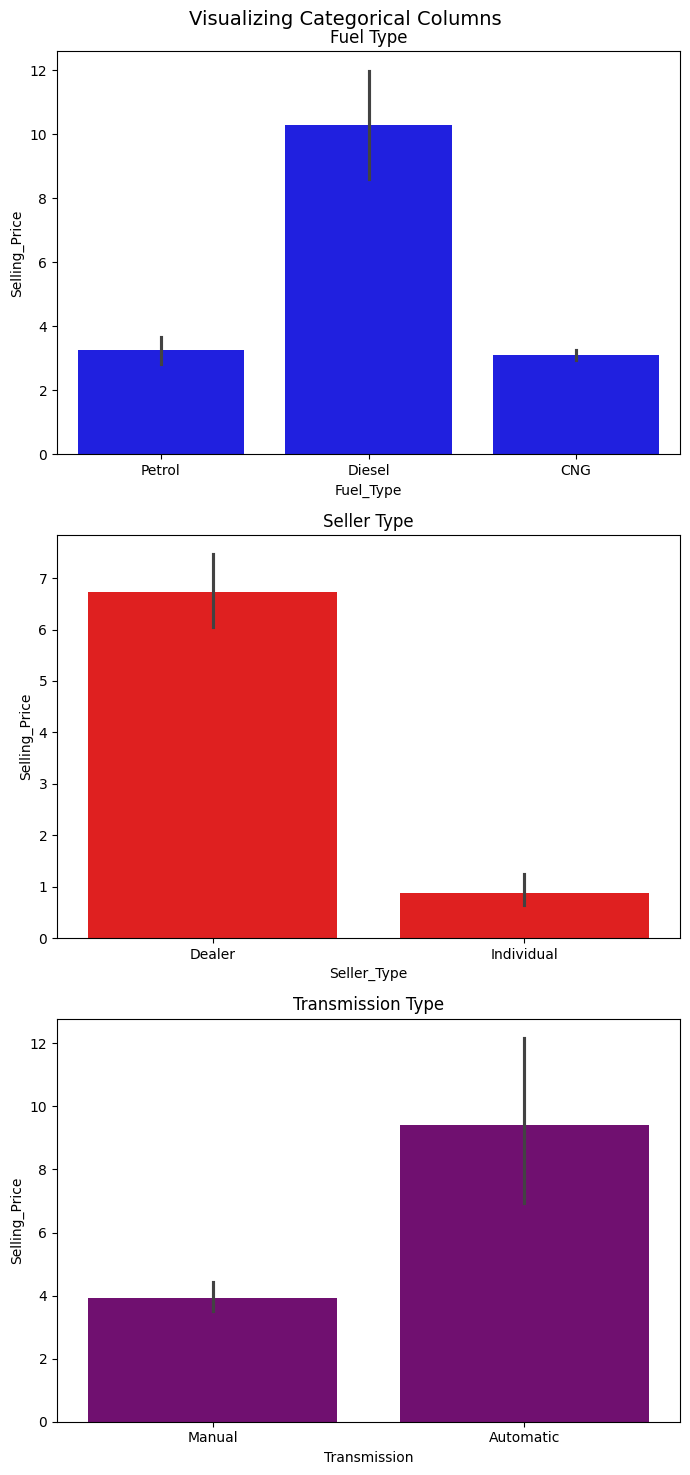

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(7, 15))
fig.suptitle("Visualizing Categorical Columns", fontsize=14)
sns.barplot(x='Fuel_Type', y='Selling_Price', data=df, ax=axes[0], color='blue')
axes[0].set_title("Fuel Type")
sns.barplot(x='Seller_Type', y='Selling_Price', data=df, ax=axes[1], color='red')
axes[1].set_title("Seller Type")
sns.barplot(x='Transmission', y='Selling_Price', data=df, ax=axes[2], color='purple')
axes[2].set_title("Transmission Type")
plt.tight_layout()
plt.show()

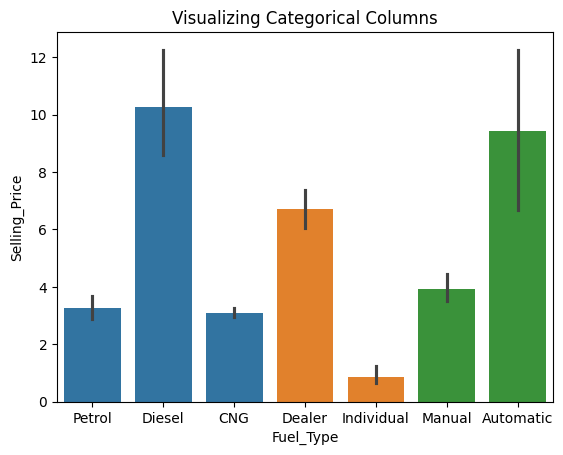

In [ ]:
sns.barplot(x='Fuel_Type', y='Selling_Price', data=df)
sns.barplot(x='Seller_Type', y='Selling_Price', data=df)
sns.barplot(x='Transmission', y='Selling_Price', data=df)
plt.title("Visualizing Categorical Columns")
plt.show()

# 9. Сгруппируйте данные по 'Fuel_Type' и отдельно проанализируйте статистику для бензиновых машин.

In [ ]:
print(df.groupby('Fuel_Type')['Selling_Price'])
petrol_df = df[df['Fuel_Type'] == 'Petrol']
print(petrol_df.describe())

              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   239.000000     239.000000     239.000000     239.000000  239.000000
mean   2013.539749       3.264184       5.583556   33528.937238    0.050209
std       3.042674       3.135537       5.290685   40308.984886    0.270368
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.600000       0.940000   13850.000000    0.000000
50%    2014.000000       2.650000       4.600000   25870.000000    0.000000
75%    2016.000000       5.200000       7.980000   44271.000000    0.000000
max    2017.000000      19.750000      23.730000  500000.000000    3.000000


# 10. Сгруппируйте данные по 'Seller_Type' и посмотрите статистику для продавцов-«Dealer».

In [ ]:
#your code here
print(df.groupby('Seller_Type')['Selling_Price'])
dealer_df = df[df['Seller_Type'] == 'Dealer']
print(dealer_df.describe())

              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   195.000000     195.000000     195.000000     195.000000  195.000000
mean   2013.712821       6.721692      10.886308   39850.133333    0.020513
std       2.686275       5.136088       8.806563   24860.401003    0.142111
min    2003.000000       1.050000       2.690000    2071.000000    0.000000
25%    2012.000000       3.750000       6.580000   22148.500000    0.000000
50%    2014.000000       5.250000       8.500000   39485.000000    0.000000
75%    2016.000000       7.625000      13.460000   51785.500000    0.000000
max    2018.000000      35.000000      92.600000  197176.000000    1.000000


# 11. Преобразуйте категориальные переменные в числовые:
# - Fuel_Type: Petrol=0, Diesel=1, CNG=2
# - Seller_Type: Dealer=0, Individual=1
# - Transmission: Manual=0, Automatic=1

In [ ]:
#your code here
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
df['Seller_Type'] = df['Seller_Type'].map({'Dealer': 0, 'Individual': 1})
df['Transmission'] = df['Transmission'].map({'Manual': 0, 'Automatic': 1})

# 12. Постройте корреляционную матрицу и визуализируйте её с помощью heatmap.

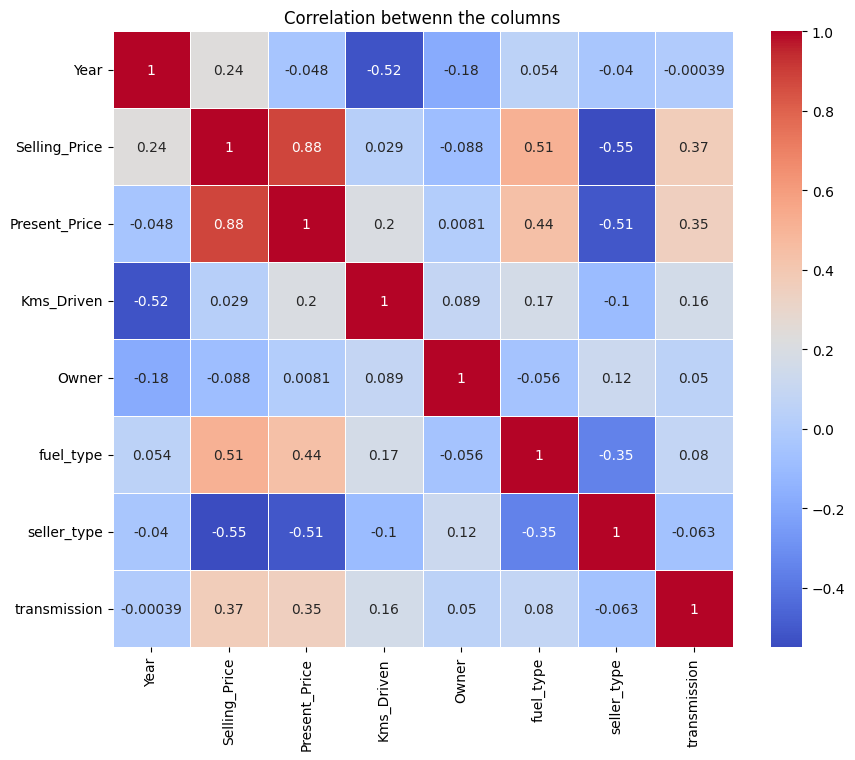

In [ ]:
#your code here
numeric_cols = df.select_dtypes(include="number").columns
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation betwenn the columns')
plt.show()

# 13. Постройте регрессионный график зависимости Selling_Price от Present_Price.

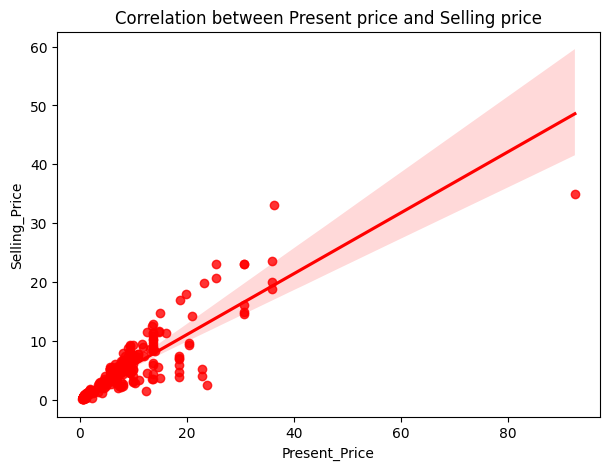

In [ ]:
#your code here
plt.figure(figsize=(7,5))
sns.regplot(x='Present_Price', y='Selling_Price', data=df, color='red')
plt.title('Correlation between Present price and Selling price')
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')
plt.show()

# 14. Создайте матрицы признаков (X) и целевой переменной (y). Удалите из X колонки 'Car_Name' и 'Selling_Price'.

In [ ]:
#your code here
X = df.drop(['Car_Name', 'Selling_Price'], axis = 1)
y = df['Selling_Price']

In [ ]:
#your code here
X.shape

(301, 7)

In [ ]:
#your code here
y.shape

(301,)

# 15. Разделите данные на обучающую и тестовую выборки (train_test_split).
# Размер тестовой выборки — 30%, random_state=43.

In [ ]:
from sklearn.model_selection import train_test_split
random_state = 43
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

In [ ]:
#your code here
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

# 16. Нормализуйте данные с помощью StandardScaler.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 17. Обучите модель линейной регрессии (LinearRegression).

In [ ]:
#your code here
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# 18. Сделайте предсказания для тестовой выборки.

In [ ]:
#your code here
y_pred = model.predict(X_test)
y_pred

array([ 7.68837102,  2.00752831,  5.92547037, -0.22390694,  0.62281431,
        8.90036753,  0.76457383, 17.0277428 ,  8.26881022,  0.31864421,
        2.28795136, 21.66106378,  4.53818811,  7.68098776,  6.93995738,
        1.79351942,  8.1002021 ,  2.95782685,  6.26956426,  7.80951331,
        3.16544612,  4.75862767,  4.35002046,  5.15056019, 11.37157116,
        8.78745414,  7.72278249,  5.63991075, 11.14274127,  2.69539767,
        3.90628681,  5.20603602,  8.64454974, 18.17480024,  4.25396679,
        2.11286943,  7.60509886,  2.10344824,  0.52755392,  0.31353662,
        3.32294476, 20.04095476,  6.56408773,  1.65699687, -0.54803264,
        4.52018919,  3.94578973,  2.47871278,  1.11454052,  2.73599869,
        6.68207655,  3.04490227,  3.62714368,  6.26655243,  1.47397748,
        1.51657441, -0.26126322,  5.94527335,  7.64377664,  9.98789983,
        0.8266805 ,  8.26881022,  4.82835267, 10.3055492 ,  6.49797273,
        4.57740321,  2.67009966,  2.44061297,  6.51394694,  0.20

In [ ]:
#your code here

# Прогнозирование результата

In [ ]:
#your code here


# 19. Посчитайте метрики качества модели:
# - MAE
# - MSE
# - R2

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
#your code here
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 20. Постройте график "Предсказанные значения vs Фактические значения".

Text(0.5, 1.0, 'Предсказанные значения vs Фактические значения')

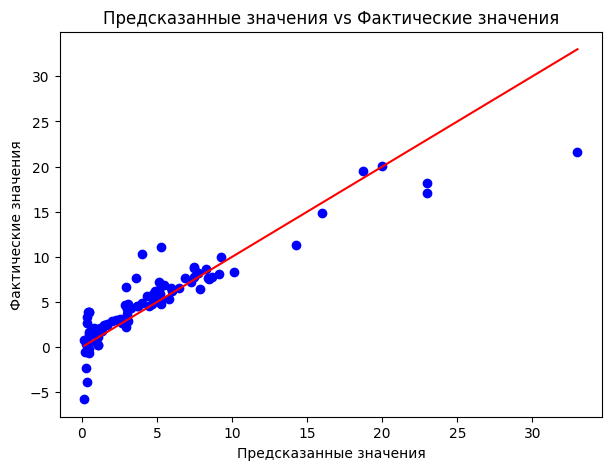

In [ ]:
#your code here
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Предсказанные значения')
plt.ylabel('Фактические значения')
plt.title('Предсказанные значения vs Фактические значения')